# exppoenential

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [42]:
# Execute this to save new versions of the notebook
jovian.commit(project="exponential")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kaustavsen16/exponential" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kaustavsen16/exponential


'https://jovian.ai/kaustavsen16/exponential'

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas import DataFrame
import pathlib
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing,acf, graphics, pacf,SARIMAX 
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.deterministic import DeterministicProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))

In [4]:
exchangerate_df = pd.read_csv('exchange_rate.csv')
exchangerate_df

,Time_Period,exchange_rate
0,01-01-2000,43.550000
1,02-01-2000,43.550000
2,03-01-2000,43.550000
3,04-01-2000,43.550000
4,05-01-2000,43.550000
...,...,...
8084,18-02-2022,74.557425
8085,19-02-2022,74.557425
8086,20-02-2022,74.557425
8087,21-02-2022,74.684248


In [5]:
exchangerate_df['exchange_rate'].index = pd.date_range("01-01-2000","22-02-2022",freq='D')

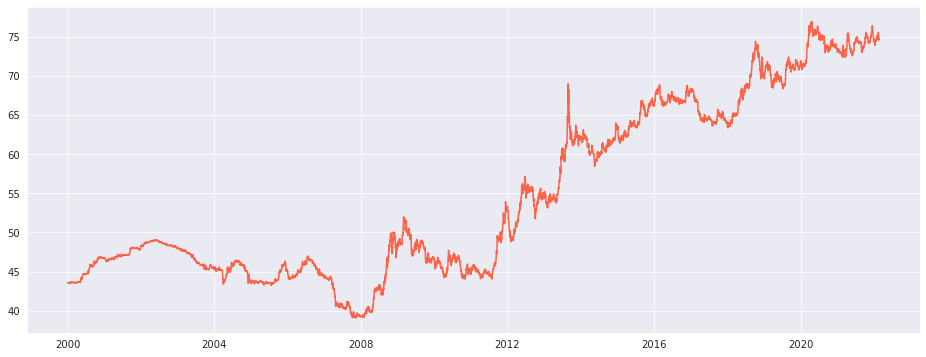

In [6]:
plt.plot(exchangerate_df['exchange_rate'],color= 'tomato')

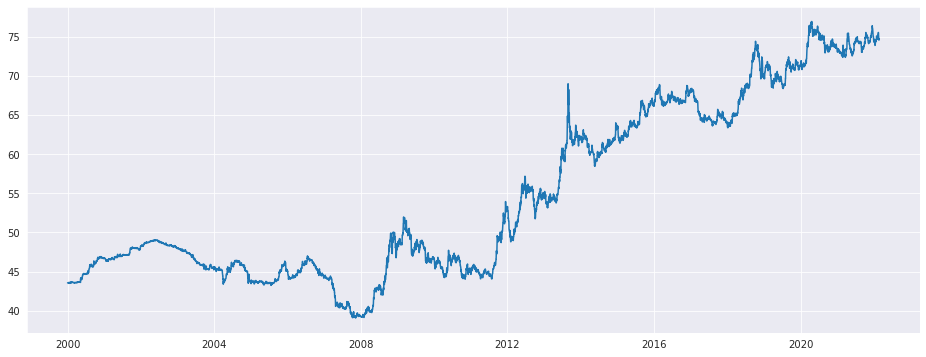

In [7]:
plt.plot(exchangerate_df.exchange_rate)
plt.show()

In [16]:
trainingdata_df = pd.read_csv('trainingdata.csv')
trainingdata_df

,Time_Period,exchange_rate
0,01-01-2000,43.550000
1,02-01-2000,43.550000
2,03-01-2000,43.550000
3,04-01-2000,43.550000
4,05-01-2000,43.550000
...,...,...
6467,15-09-2017,64.083006
6468,16-09-2017,64.083006
6469,17-09-2017,64.083006
6470,18-09-2017,64.137513


In [19]:
trainingdata_df['exchange_rate'].index = pd.date_range("01-01-2000","19-09-2017",freq='D')

In [17]:
testdata_df = pd.read_csv('testdata.csv')
testdata_df

,Time_Period,exchange_rate
0,20-09-2017,64.292912
1,21-09-2017,64.804284
2,22-09-2017,64.794750
3,23-09-2017,64.794750
4,24-09-2017,64.794750
...,...,...
1612,18-02-2022,74.557425
1613,19-02-2022,74.557425
1614,20-02-2022,74.557425
1615,21-02-2022,74.684248


In [29]:
fit = ExponentialSmoothing(
    exchangerate_df['exchange_rate'],
    seasonal_periods=365,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

simulations = fittraining.simulate(1617, repetitions=100, error="add")

plt.plot(simulations, alpha=0.05 )

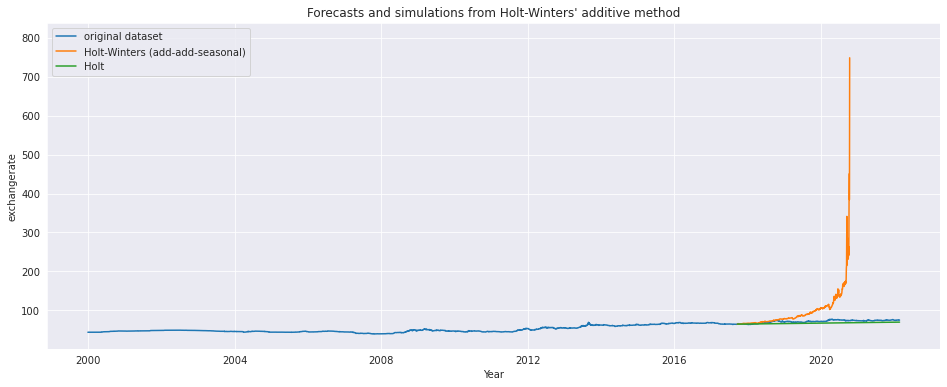

,Additive
$\alpha$,9.596429e-01
$\beta$,1.000000e-04
$\phi$,9.900000e-01
$\gamma$,2.421429e-02
$l_0$,3.589232e-01
$b_0$,4.730452e-09
SSE,3.068514e+02


In [49]:

fittraining1 = ExponentialSmoothing(
    trainingdata_df['exchange_rate'],
    seasonal_periods=365,
    trend="add",
    seasonal="add",
    
    use_boxcox=True,
    initialization_method="estimated",
).fit()

HES_optimal = Holt(trainingdata_df['exchange_rate'],initialization_method='estimated').fit()


results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fittraining.params[p] for p in params] + [fit.sse]

plt.plot( exchangerate_df['exchange_rate'],label="original dataset")

plt.plot(fittraining1.forecast(1617),label="Holt-Winters (add-add-seasonal)")

plt.plot(HES_optimal.forecast(1617),label="Holt ")
plt.title("Forecasts and simulations from Holt-Winters' additive method")
plt.xlabel("Year")
plt.ylabel("exchangerate")
plt.legend()
plt.show()
results
